In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp, pi
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
# from scipy.optimize import curve_fit
# from scipy.stats import norm
import matplotlib.mlab as mlab
# from pylab import rcParams
#import seaborn as sns
#sns.set()


# from root_numpy import root2array, tree2array,testdata
# from root_pandas import read_root
# from glob import glob
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
# from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
myfile_beam_off='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_EXTC1C2_hadd_hist.root'
myfile_beam_on='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_5E19_hadd_hist.root'
myfile_Overlay='/uboone/data/users/abhat/GammaCatcher/davidc_lowthreshold/gammacorrelation_davidc_lowthreshold_OVERLAY_hadd_hist.root'

In [4]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'

TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"
TREE_HIT="Hittree"
TREE_POT="potTree"

# BRANCH_EVT = '/gammacorrelation/Event_Correlationtree'
# BRANCH_SPS = '/gammacorrelation/Sps_Correlationtree'

In [5]:
NUSELECTION_event = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7 and tracklength>20'# and Event_cluster_charge>5 and sps_cluster_charge10>5 and sps_cluster_charge20>5 and sps_cluster_charge50>5' # and tracklength>20 and distance_nu_smallest>15'
NUSELECTION_sps = 'Vertex_x>50.0 and Vertex_x<206.35 and Vertex_y>-66.5 and Vertex_y<66.5 and Vertex_z>50.0 and Vertex_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7 and tracklength>20'# and sps_cluster_charge>5 ' # and tracklength>20 and distance_nu_smallest>15'
# NUSELECTION_rand='_rand_vtx_x>50.0 and _rand_vtx_x<206.35 and _rand_vtx_y>-66.5 and _rand_vtx_y<66.5 and _rand_vtx_z>50.0 and _rand_vtx_z<886.8 and neutrinoshowers==0 and neutrinotracks>0 and cosmic_trk_50==0 and muon_pz>0.7 ' # and tracklength>20 and distance_nu_smallest>15'

In [6]:
df_Event_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_EVENT]
# df_Sps_beam_on=uproot.open(myfile_beam_on)[folder_corr][TREE_SPS]

# df_Event_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_EVT))
# df_Sps_beam_on=pd.DataFrame(root2array( myfile_beam_on,BRANCH_SPS))

print(len(df_Event_beam_on))

df_Event_beam_on = df_Event_beam_on.pandas.df().query(NUSELECTION_event)
# df_Sps_beam_on = df_Sps_beam_on.pandas.df().query(NUSELECTION_sps)


print(len(df_Event_beam_on))


39386
1100


In [7]:
df_Event_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_EVENT]
# df_Sps_beam_off=uproot.open(myfile_beam_off)[folder_corr][TREE_SPS]

# df_Event_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_EVT))
# df_Sps_beam_off=pd.DataFrame(root2array( myfile_beam_off,BRANCH_SPS))
print(len(df_Event_beam_off))

df_Event_beam_off = df_Event_beam_off.pandas.df().query(NUSELECTION_event)
# df_Sps_beam_off = df_Sps_beam_off.pandas.df().query(NUSELECTION_sps)

print(len(df_Event_beam_off))


113850
647


In [8]:
df_Event_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_EVENT]
# df_Sps_overlay=uproot.open(myfile_Overlay)[folder_corr][TREE_SPS]

# df_Event_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_EVT))
# df_Sps_beam_overlay=pd.DataFrame(root2array( myfile_beam_Overlay,BRANCH_SPS))


print(len(df_Event_overlay))

df_Event_overlay = df_Event_overlay.pandas.df().query(NUSELECTION_event)
# df_Sps_overlay = df_Sps_overlay.pandas.df().query(NUSELECTION_sps)

print(len(df_Event_overlay))


102830
2419


In [9]:
df_Event_beam_off.head()

,evttime,Vertex_x,Vertex_y,Vertex_z,_rand_vtx_x,_rand_vtx_y,_rand_vtx_z,distance_smallest,distance_smallest_nu,N_sps,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_cosmic_smallest,cosmic_trk_50,N_Run,N_SubRun
entry,,,,,,,,,,,,,,,,,,,,,
206,1467800088,173.307648,-56.173244,175.127579,166.794056,-109.551537,401.676930,69.830696,815.396776,2752,...,1,-0.319108,-0.581789,0.748125,79.781319,253.854831,77.925897,0,6798,201
497,1458509816,61.780487,39.830444,67.742378,32.799799,10.990167,84.789188,41.541758,852.291453,2279,...,1,0.251854,0.541245,0.802262,138.814560,83.871464,90.349332,0,5518,30
1289,1459787457,138.718140,56.078510,663.717590,127.716871,51.922082,148.887041,25.467049,356.277154,2157,...,2,0.004395,-0.499986,0.866023,32.913807,201.739332,115.450810,0,5762,105
1319,1466667517,166.522583,-64.505867,447.668518,157.139087,108.058219,512.011209,36.738750,554.991938,1799,...,1,0.466293,0.533416,0.705718,207.135849,162.364965,57.662809,0,6640,83
1378,1465353677,103.857689,-51.309978,646.397583,175.558842,-93.691310,126.621468,73.385858,412.131365,2838,...,1,-0.432011,0.356770,0.828301,12.256063,243.467529,51.321487,0,6506,194


In [10]:
df_POT_MC =uproot.open(myfile_Overlay)[folder_corr][TREE_POT]
df_POT_MC = df_POT_MC.pandas.df()
df_POT_MC.head()
POT_OVERLAY = np.sum(df_POT_MC['sr_pot'].values)
print POT_OVERLAY

1.271096180771032e+20


In [11]:
#This info provided by David C.

BNB_POT= 4.54E19
BNB_triggers=10080350.0
C1_triggers=33682387.0
C2_triggers=31816420.0
C1_C2_triggers=C1_triggers+C2_triggers
print C1_C2_triggers
#The off-beam normalization is = [BNB #triggers] / [EXT #triggers]
off_scaling=(BNB_triggers/C1_C2_triggers)
print off_scaling
#0.1539012764
#The overlay normalization is = [BNB POT] / [Overlay POT]
overlay_scaling=(BNB_POT/POT_OVERLAY)
print(overlay_scaling)
#0.35719987283306953

# off_scaling=0.1539012764




# overlay_scaling=0.30




65498807.0
0.1539012764
0.35717202747364796


In [12]:
# BINS = np.linspace(0,1.,50)

# fig = plt.figure(figsize=(8,8))

# binv, bine = np.histogram(df_Sps_beam_off['distance_rand_vtx'].values/100,bins=BINS)
# binc = (0.5)*(bine[1:]+bine[:-1])
# binv = binv.astype(float) 
# errors = np.sqrt(binv)
# NEVTS = df_Event_beam_off.shape[0]
# binv /= NEVTS
# errors /= NEVTS
# plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)

# plt.show()


# BINWIDTH = binc[1]-binc[0]


In [13]:
# def fun(x,c):
#     return 4*pi*x*x*c*BINWIDTH
# f2 = np.vectorize(fun)
# fun(1.,1)

In [14]:
# guess = [0.60]

In [15]:
# xvals = np.linspace(bine[0],bine[-1],100)

In [16]:
# popt,popv = curve_fit(f2,binc,binv,p0=guess)

In [17]:
# print popt

In [18]:
# fig = plt.figure(figsize=(10,6))
# plt.errorbar(binc,binv,yerr=errors,fmt='o',color='r',markersize=5)
# plt.plot(xvals,f2(xvals,*popt),'b--',lw=4,label='$4 \pi r^2 \Delta r \\rho $ \n $\\rho$ : %.02f spacepoints / $m^3$'%(popt[0]))
# plt.grid()
# plt.xlabel('Distance (meters)')
# plt.ylabel('Entries')
# plt.title("Distance between a random vertex and 3-D SpacePoint")
# plt.legend(loc=2,fontsize=16)
# plt.show()
# fig.savefig('curve.png', dpi=500)

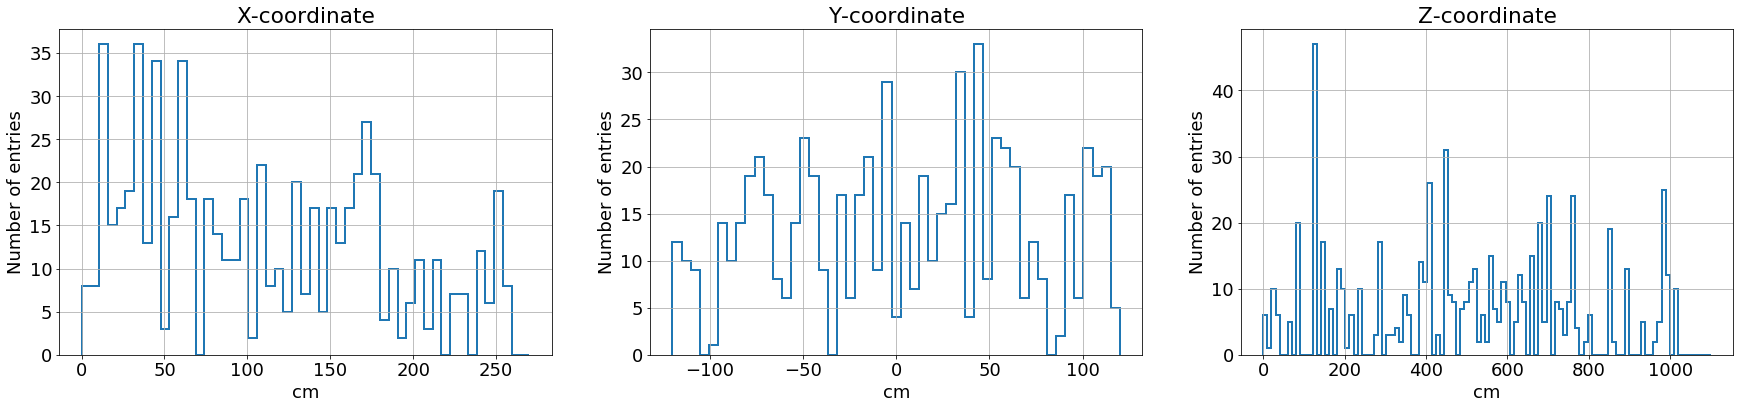

In [19]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(0,270,52)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Event_beam_off['_rand_vtx_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("X-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(-120,120,50)
plt.hist(df_Event_beam_off['_rand_vtx_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Y-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1100,110)
plt.hist(df_Event_beam_off['_rand_vtx_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Z-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

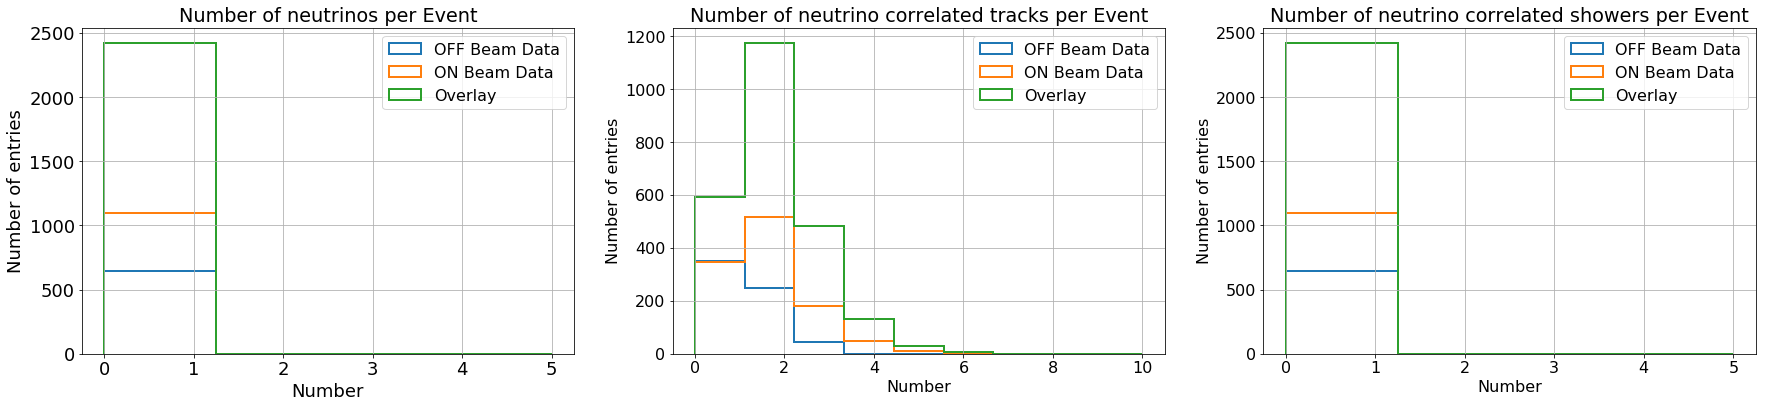

In [20]:
BINS = np.linspace(0,5,5)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of neutrinos per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)
BINS = np.linspace(0,10,10)
plt.hist(df_Event_beam_off['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of neutrino correlated tracks per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 3)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_beam_off['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of neutrino correlated showers per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

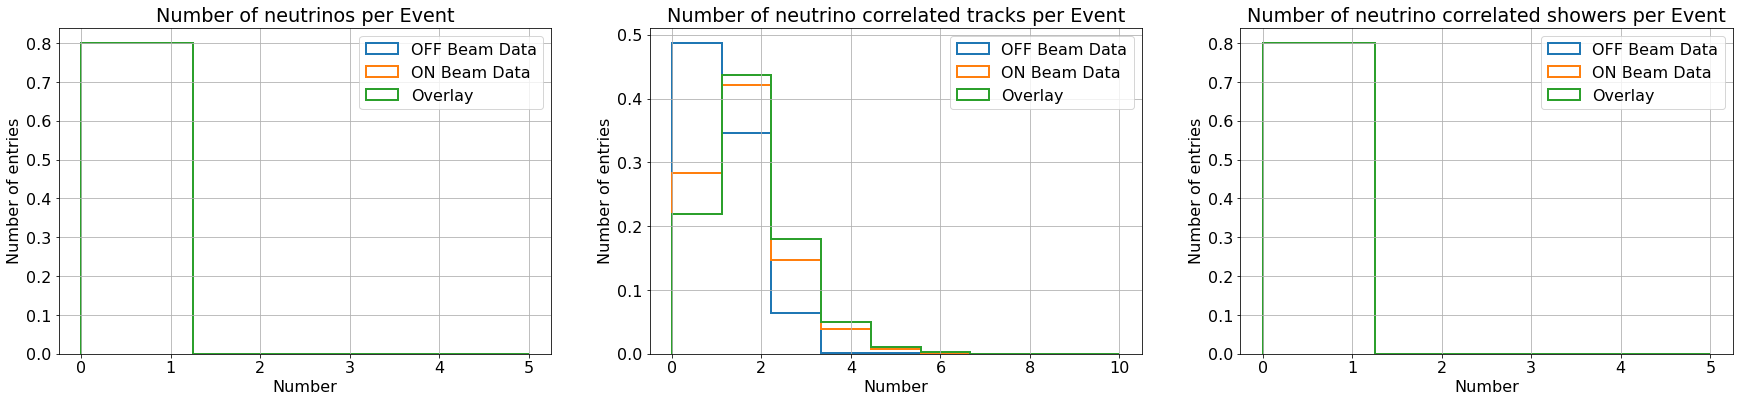

In [21]:
BINS = np.linspace(0,5,5)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['neutrinos'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of neutrinos per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)
BINS = np.linspace(0,10,10)
plt.hist(df_Event_beam_off['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['neutrinotracks'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of neutrino correlated tracks per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 3)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_beam_off['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['neutrinoshowers'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of neutrino correlated showers per Event")
plt.xlabel('Number')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

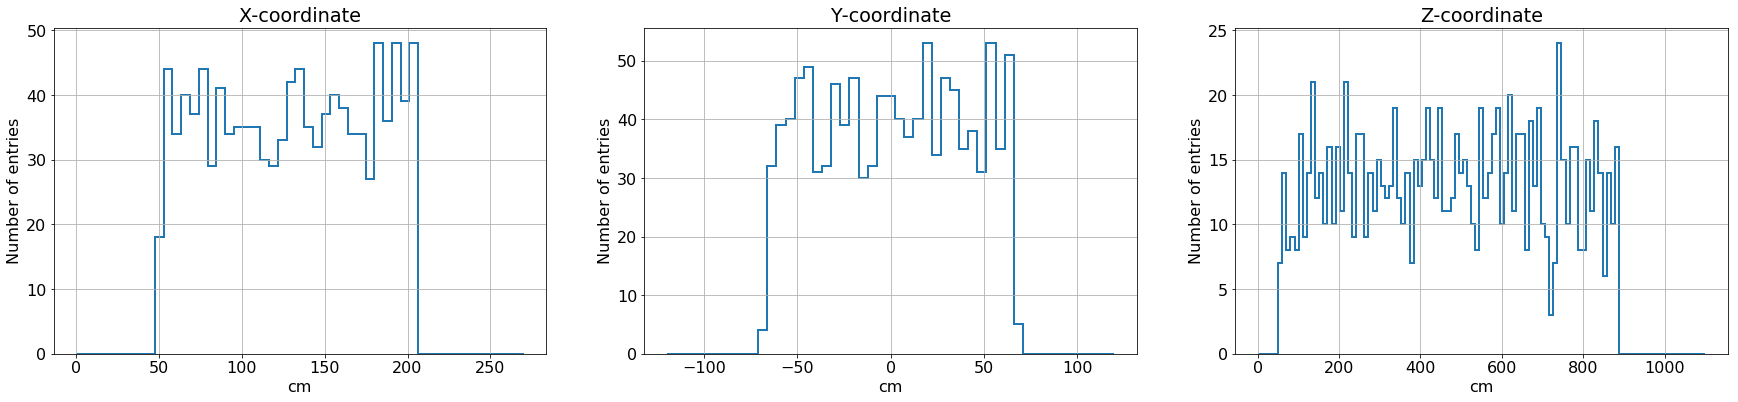

In [22]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(0,270,52)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Event_beam_on['Vertex_x'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("X-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(-120,120,50)
plt.hist(df_Event_beam_on['Vertex_y'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Y-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1100,110)
plt.hist(df_Event_beam_on['Vertex_z'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("Z-coordinate")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

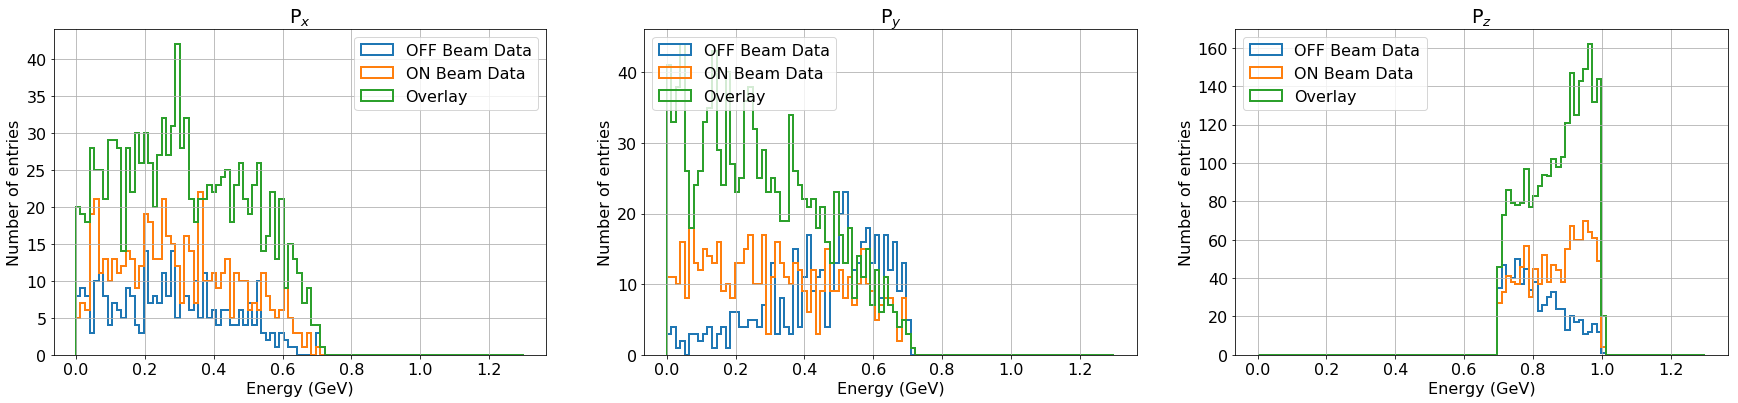

In [23]:

#Momentum values for the longest track from the neutrino vertex (muon)
BINS = np.linspace(0,1.3,100)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['muon_px'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['muon_px'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['muon_px'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("P$_{x}$")
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)

plt.hist(df_Event_beam_off['muon_py'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['muon_py'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['muon_py'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("P$_{y}$")
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.subplot(1, 3, 3)

plt.hist(df_Event_beam_off['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['muon_pz'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("P$_{z}$")
plt.xlabel('Energy (GeV)')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=2)
plt.show()
#pz>0.7
# fig.savefig('hist.png', dpi=500)

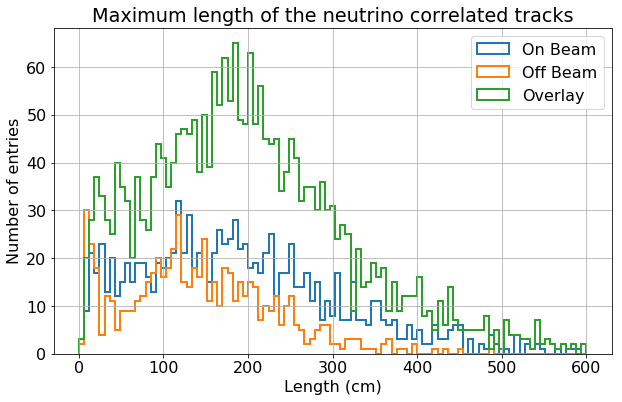

In [24]:
BINS = np.linspace(0,600,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['maxTrkLen'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Maximum length of the neutrino correlated tracks")
plt.xlabel('Length (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

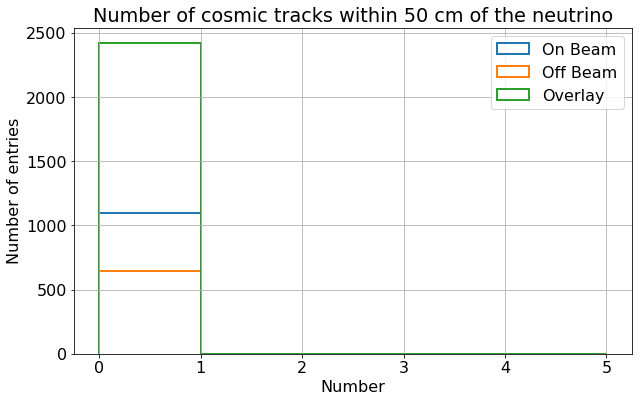

In [25]:
BINS = np.linspace(0,5,6)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['cosmic_trk_50'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['cosmic_trk_50'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['cosmic_trk_50'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Number of cosmic tracks within 50 cm of the neutrino")
plt.xlabel('Number')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

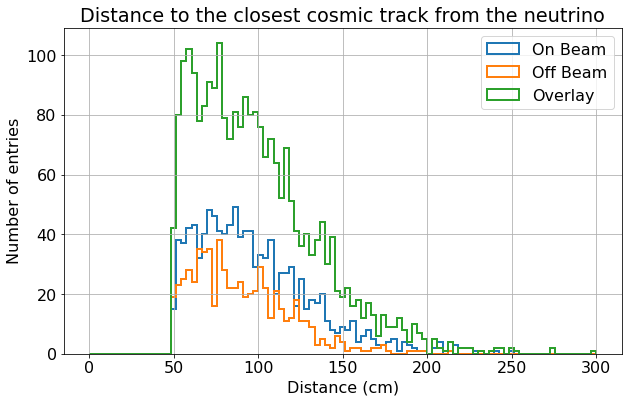

In [26]:
BINS = np.linspace(0,300,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['distance_nu_cosmic_smallest'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['distance_nu_cosmic_smallest'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['distance_nu_cosmic_smallest'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Distance to the closest cosmic track from the neutrino")
plt.xlabel('Distance (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

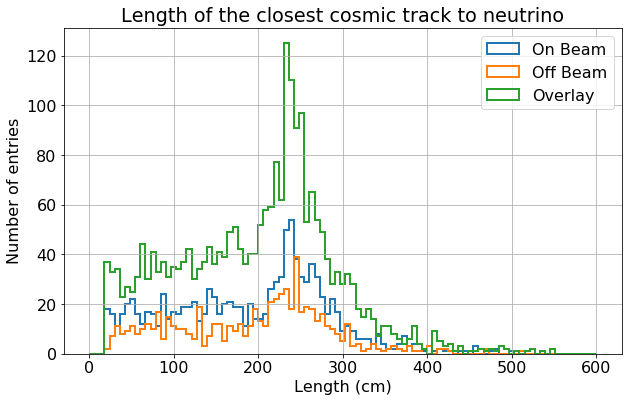

In [27]:
BINS = np.linspace(0,600,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_on['tracklength'].values,bins=BINS,histtype='step',lw=2,label='On Beam')
plt.hist(df_Event_beam_off['tracklength'].values,bins=BINS,histtype='step',lw=2,label='Off Beam')
plt.hist(df_Event_overlay['tracklength'].values,bins=BINS,histtype='step',lw=2,label='Overlay')


plt.legend(loc=1)

plt.grid()
plt.title("Length of the closest cosmic track to neutrino")
plt.xlabel('Length (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

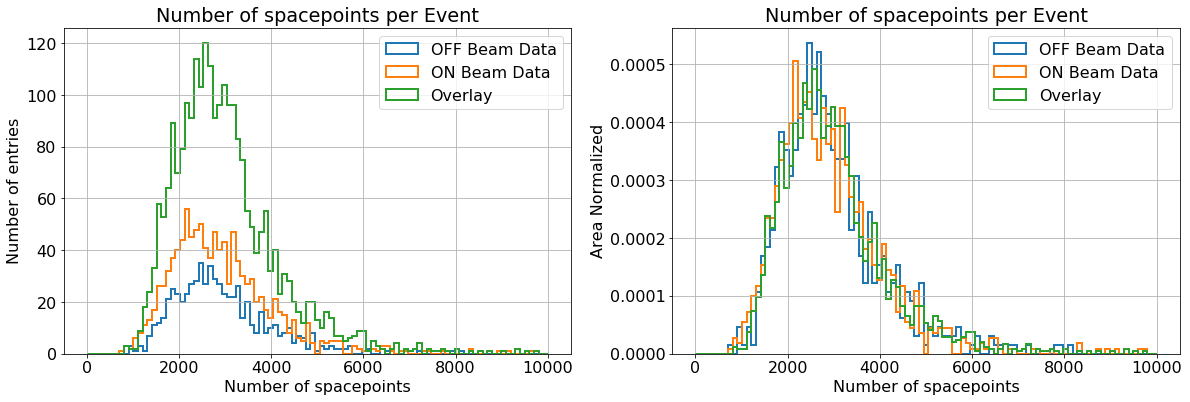

In [28]:
BINS = np.linspace(0,10000,100)

fig = plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data')
plt.hist(df_Event_beam_on['N_sps'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data')
plt.hist(df_Event_overlay['N_sps'].values,bins=BINS,histtype='step',lw=2,label='Overlay')

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 2, 2)
plt.hist(df_Event_beam_off['N_sps'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

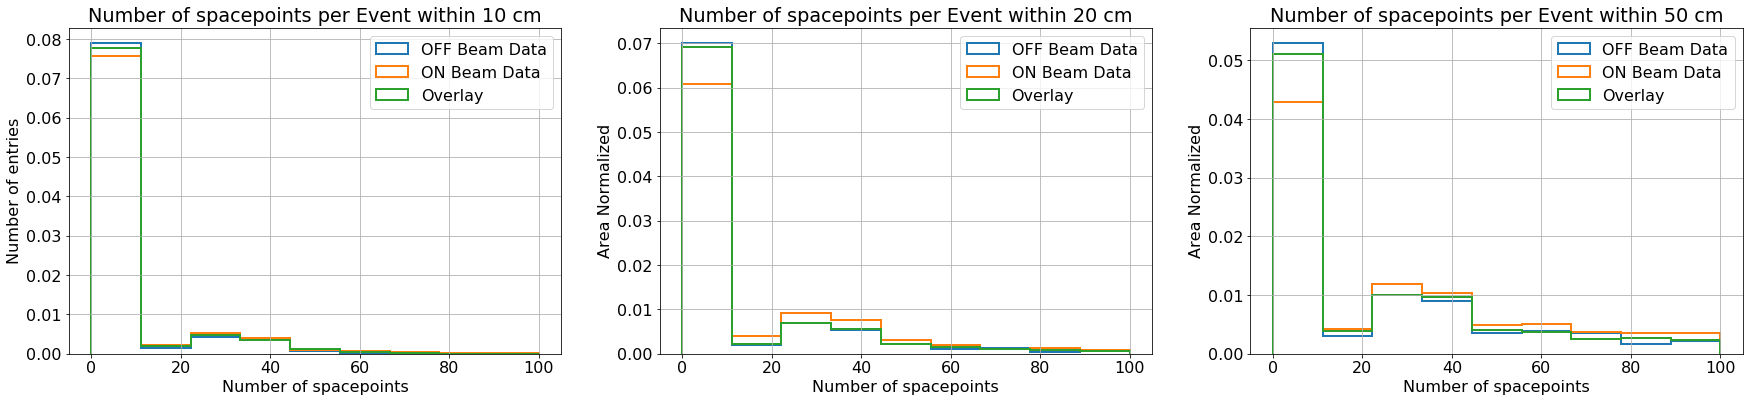

In [29]:
BINS = np.linspace(0,100,10)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['N_sps10'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps10'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps10'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 10 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 3, 2)
plt.hist(df_Event_beam_off['N_sps20'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps20'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps20'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 20 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)

plt.subplot(1, 3, 3)
plt.hist(df_Event_beam_off['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps50'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 50 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=500)

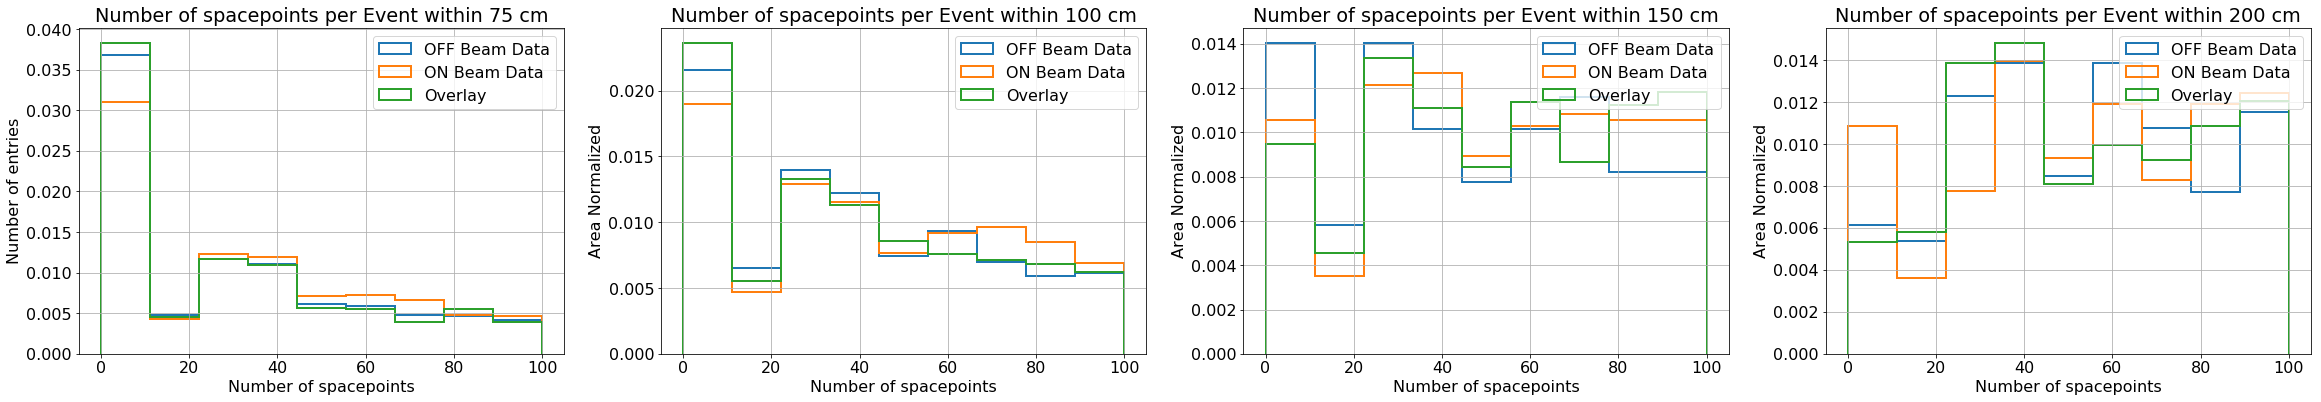

In [30]:
BINS = np.linspace(0,100,10)

fig = plt.figure(figsize=(40,6))
plt.subplot(1, 4, 1)

plt.rcParams.update({'font.size': 16})
plt.hist(df_Event_beam_off['N_sps75'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps75'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps75'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 75 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Number of entries')
plt.grid()
plt.legend(loc=1)
plt.subplot(1, 4, 2)
plt.hist(df_Event_beam_off['N_sps100'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps100'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps100'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 100 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)

plt.subplot(1, 4, 3)
plt.hist(df_Event_beam_off['N_sps150'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps150'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps150'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 150 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)


plt.subplot(1, 4, 4)
plt.hist(df_Event_beam_off['N_sps200'].values,bins=BINS,histtype='step',lw=2,label='OFF Beam Data',density=True)
plt.hist(df_Event_beam_on['N_sps200'].values,bins=BINS,histtype='step',lw=2,label='ON Beam Data',density=True)
plt.hist(df_Event_overlay['N_sps200'].values,bins=BINS,histtype='step',lw=2,label='Overlay',density=True)

plt.title("Number of spacepoints per Event within 200 cm")
plt.xlabel('Number of spacepoints')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=1)
plt.show()

# fig.savefig('hist.png', dpi=507

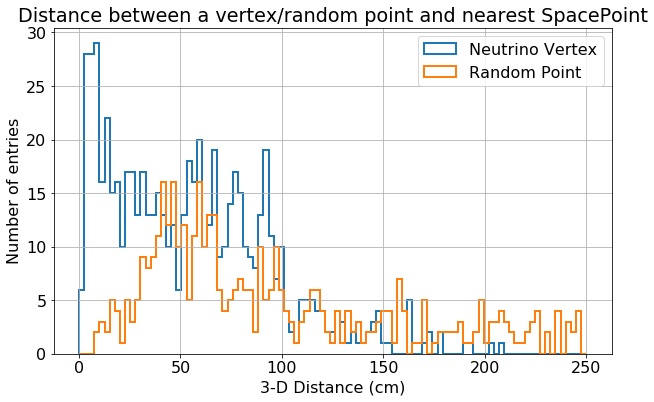

In [31]:
BINS = np.linspace(0,250,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_off['distance_smallest'].values,bins=BINS,histtype='step',lw=2,label='Neutrino Vertex')
plt.hist(df_Event_beam_off['distance_smallest_rand_vtx'].values,bins=BINS,histtype='step',lw=2,label='Random Point')

plt.legend(loc=1)

plt.grid()
plt.title("Distance between a vertex/random point and nearest SpacePoint")
plt.xlabel('3-D Distance (cm)')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

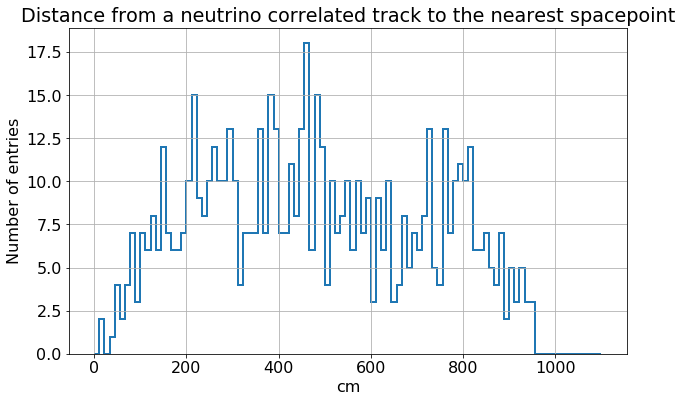

In [32]:
BINS = np.linspace(0,1100,100)

fig = plt.figure(figsize=(10,6))
plt.hist(df_Event_beam_off['distance_smallest_nu'].values,bins=BINS,histtype='step',lw=2)

#plt.legend(loc=1)

plt.grid()
plt.title("Distance from a neutrino correlated track to the nearest spacepoint")
plt.xlabel('cm')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

In [33]:
BINS = np.linspace(0,1100,110)

# nOFF_Sps = len(df_Sps_beam_off)
# weightsOFF_Sps = np.ones(nOFF_Sps) * off_scaling # factor needed to scale off-beam to on-beam

# nOverlay_Sps = len(df_Sps_overlay)
# weightsOverlay_Sps = np.ones(nOverlay_Sps) * overlay_scaling # factor needed to scale Overlay to on-beam

# nON_Sps  = len(df_Sps_beam_on)
# weightsON_Sps  = np.ones(nON_Sps) 



nOFF_Event = len(df_Event_beam_off)
weightsOFF_Event = np.ones(nOFF_Event) * off_scaling # factor needed to scale off-beam to on-beam

nOverlay_Event = len(df_Event_overlay)
weightsOverlay_Event = np.ones(nOverlay_Event) * overlay_scaling # factor needed to scale Overlay to on-beam

nON_Event  = len(df_Event_beam_on)
weightsON_Event  = np.ones(nON_Event)  


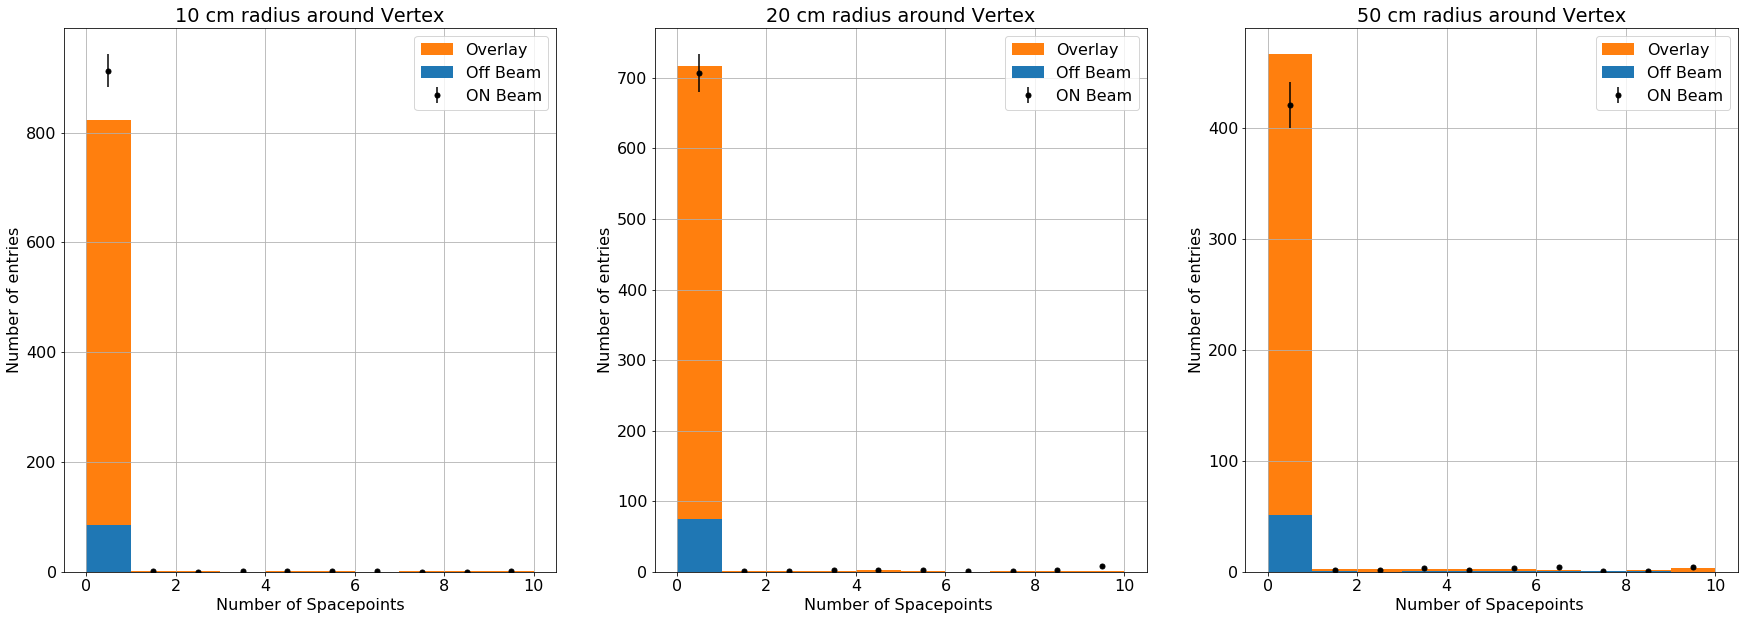

In [34]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off['N_sps10'].values,df_Event_overlay['N_sps10'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['N_sps10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)

xstacked = [df_Event_beam_off['N_sps20'].values,df_Event_overlay['N_sps20'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)

xstacked = [df_Event_beam_off['N_sps50'].values,df_Event_overlay['N_sps50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

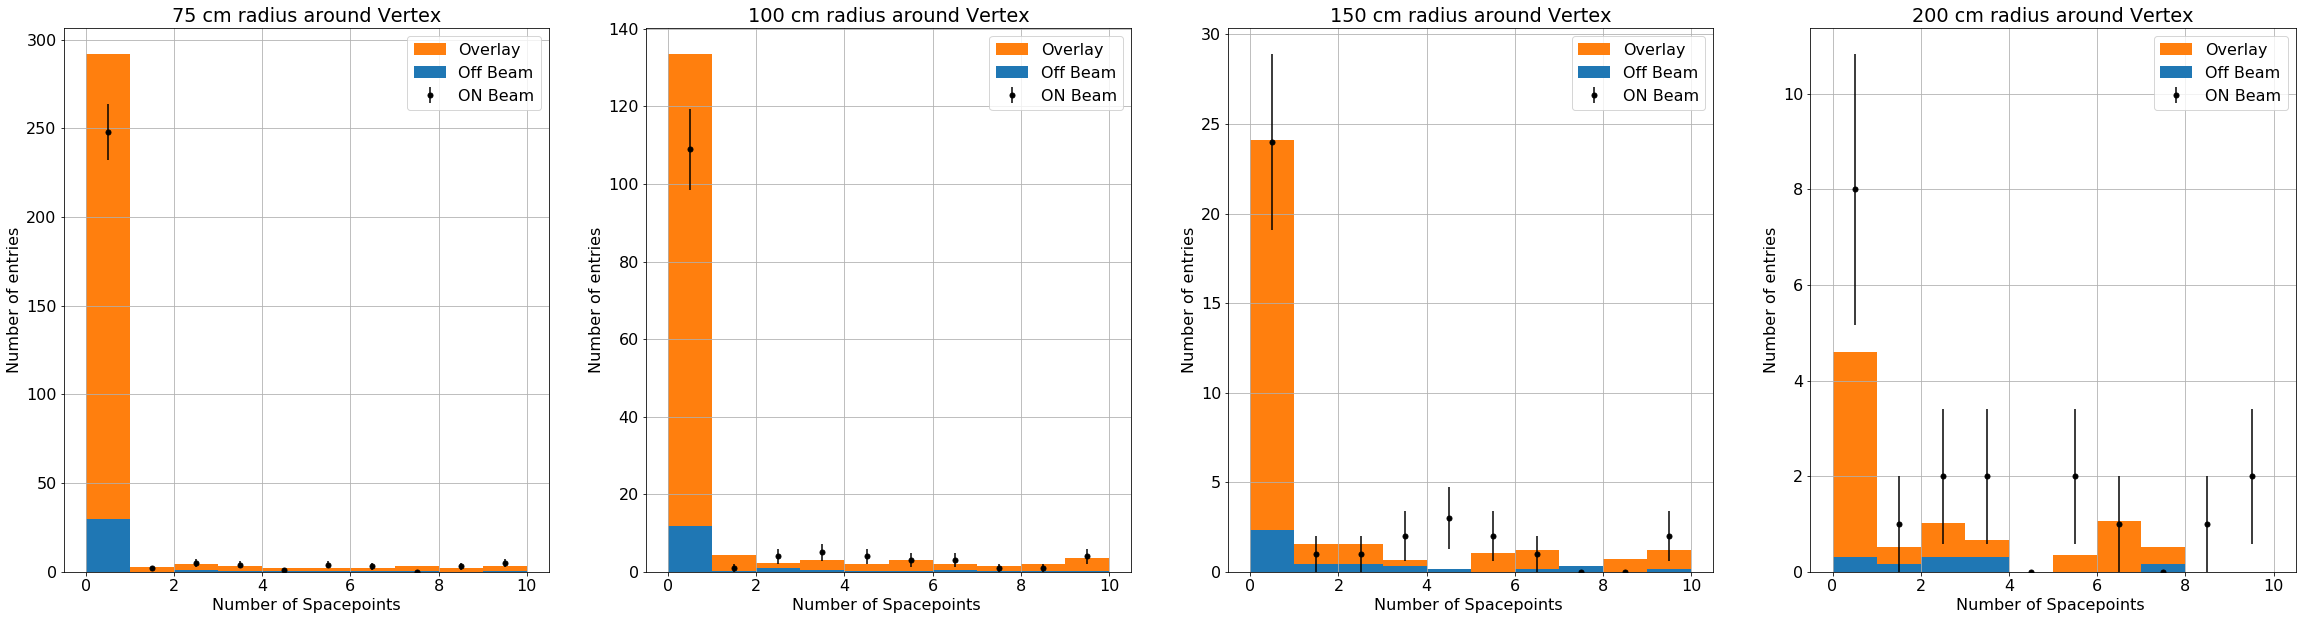

In [35]:
fig = plt.figure(figsize=(40,10))

plt.subplot(1, 4, 1)
BINS = np.linspace(0,10,11)
xstacked = [df_Event_beam_off['N_sps75'].values,df_Event_overlay['N_sps75'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['N_sps75'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("75 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 2)

xstacked = [df_Event_beam_off['N_sps100'].values,df_Event_overlay['N_sps100'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps100'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("100 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()


plt.subplot(1, 4, 3)

xstacked = [df_Event_beam_off['N_sps150'].values,df_Event_overlay['N_sps150'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps150'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("150 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 4)

xstacked = [df_Event_beam_off['N_sps200'].values,df_Event_overlay['N_sps200'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps200'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("200 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

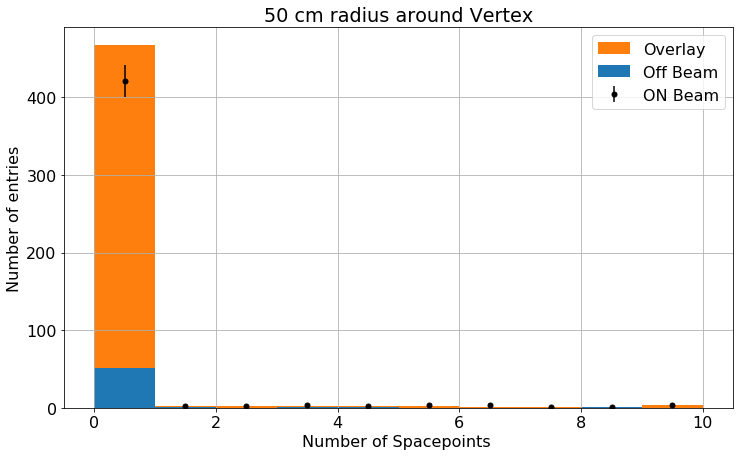

In [36]:
fig = plt.figure(figsize=(12,7))
BINS = np.linspace(0,10,11)


xstacked = [df_Event_beam_off['N_sps50'].values,df_Event_overlay['N_sps50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['N_sps50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
# plt.yscale('log')
plt.grid()
fig.savefig('counting_blips', dpi=300)

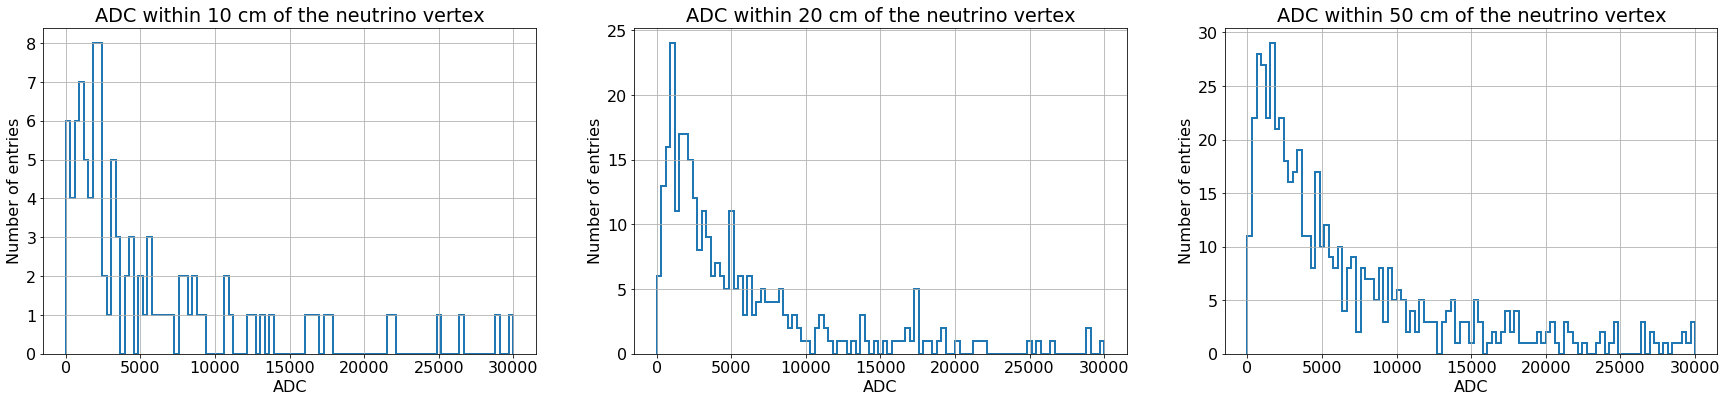

In [37]:
#MicroBooNE coordinates : x[0,256.35], y[-116.5,116.5], z[0,1036.8]

BINS = np.linspace(1,30000,100)

fig = plt.figure(figsize=(30,6))
plt.subplot(1, 3, 1)
plt.hist(df_Event_beam_on['sps_cluster_charge10'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("ADC within 10 cm of the neutrino vertex")
plt.xlabel('ADC')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 2)
BINS = np.linspace(1,30000,100)
plt.hist(df_Event_beam_on['sps_cluster_charge20'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("ADC within 20 cm of the neutrino vertex")
plt.xlabel('ADC')
plt.ylabel('Number of entries')

plt.subplot(1, 3, 3)
BINS = np.linspace(1,30000,100)
plt.hist(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS,histtype='step',lw=2)#,label='X-coordinate')
plt.grid()
plt.title("ADC within 50 cm of the neutrino vertex")
plt.xlabel('ADC')
plt.ylabel('Number of entries')

plt.show()
#plt.draw()
#fig.savefig('distance_smallest', dpi=500)

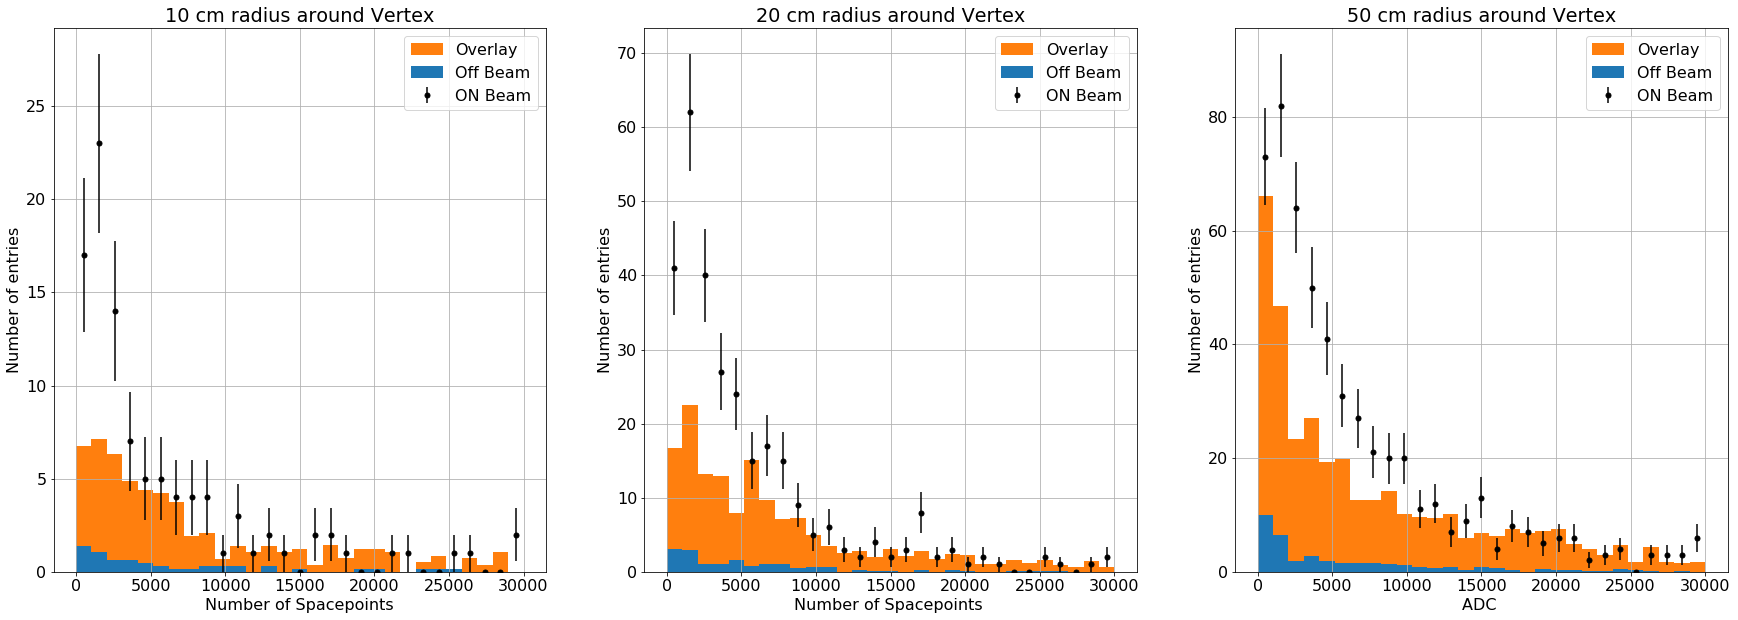

In [38]:
fig = plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
BINS = np.linspace(1,30000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge10'].values,df_Event_overlay['sps_cluster_charge10'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge10'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("10 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 3, 2)

xstacked = [df_Event_beam_off['sps_cluster_charge20'].values,df_Event_overlay['sps_cluster_charge20'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge20'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("20 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 3, 3)

xstacked = [df_Event_beam_off['sps_cluster_charge50'].values,df_Event_overlay['sps_cluster_charge50'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

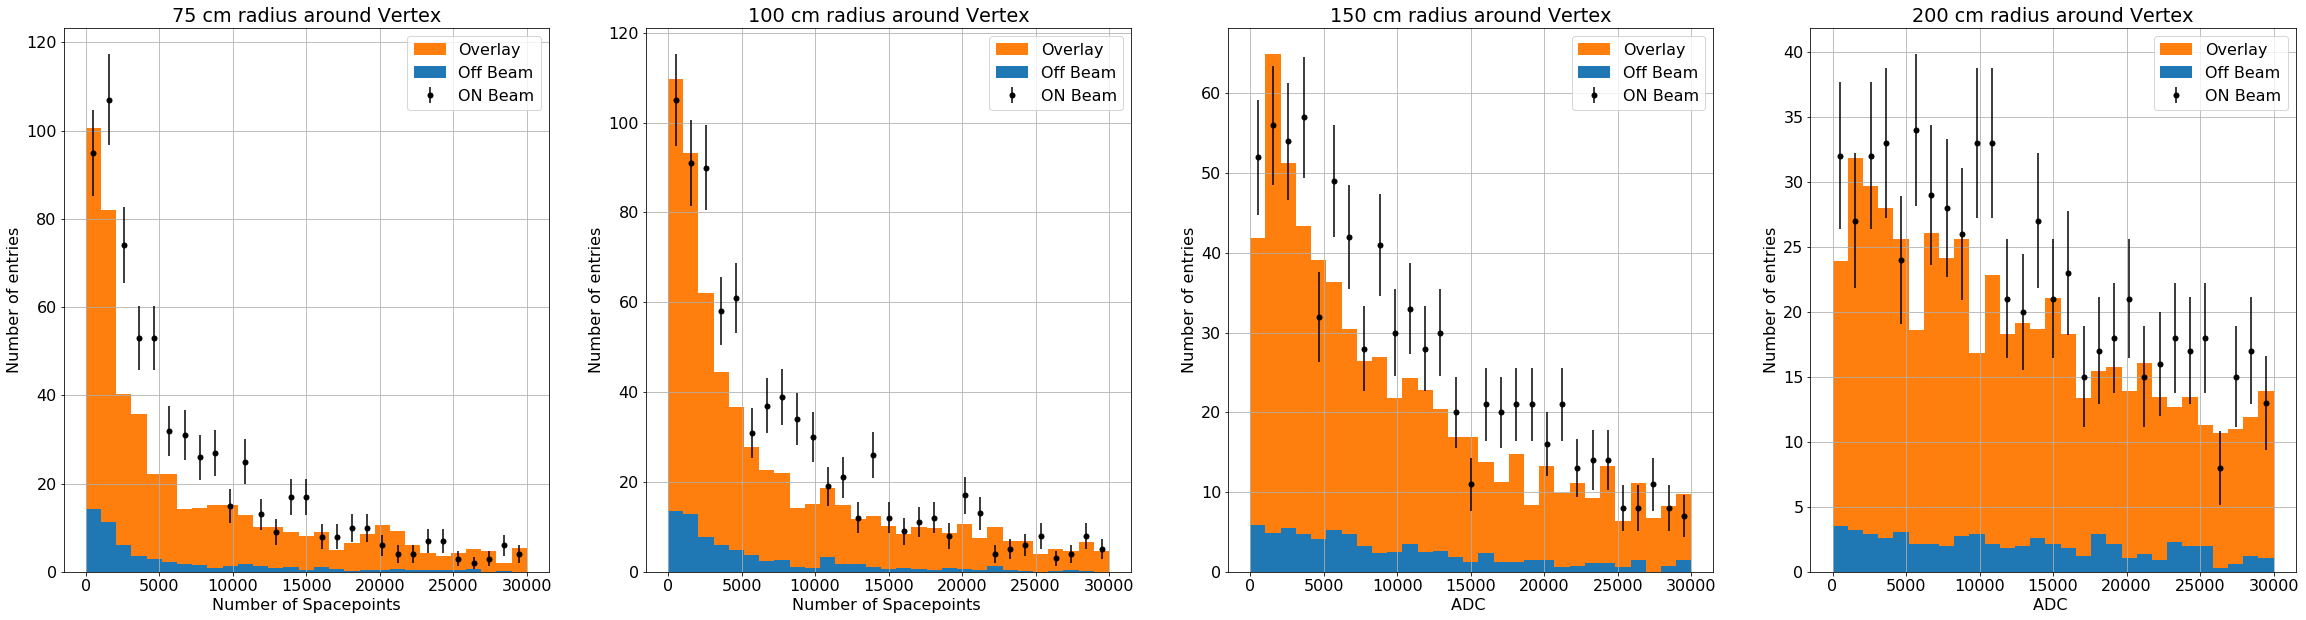

In [41]:
fig = plt.figure(figsize=(40,10))

plt.subplot(1, 4, 1)
BINS = np.linspace(1,30000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge75'].values,df_Event_overlay['sps_cluster_charge75'].values]

WEIGHTS_Event = [weightsOFF_Event,weightsOverlay_Event]
LABELS = ['Off Beam','Overlay']

plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)

vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge75'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("75 cm radius around Vertex")
plt.xlabel('Number of Spacepoints')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 4, 2)

xstacked = [df_Event_beam_off['sps_cluster_charge100'].values,df_Event_overlay['sps_cluster_charge100'].values]


LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge100'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("100 cm radius around Vertex")
plt.xlabel('Number of Spacepoints ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()


plt.subplot(1, 4, 3)

xstacked = [df_Event_beam_off['sps_cluster_charge150'].values,df_Event_overlay['sps_cluster_charge150'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge150'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("150 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()

plt.subplot(1, 4,4)

xstacked = [df_Event_beam_off['sps_cluster_charge200'].values,df_Event_overlay['sps_cluster_charge200'].values]

LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge200'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("200 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
# fig.savefig('trio', dpi=300)

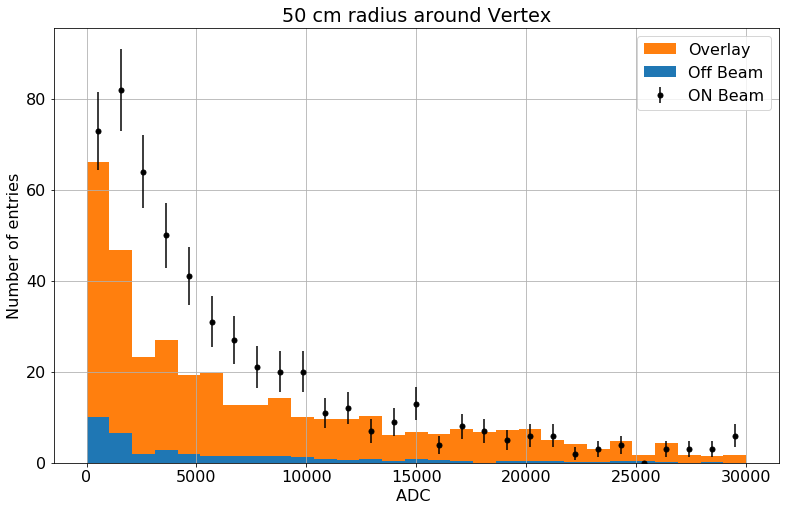

In [42]:

BINS = np.linspace(1,30000,30)
xstacked = [df_Event_beam_off['sps_cluster_charge50'].values,df_Event_overlay['sps_cluster_charge50'].values]

LABELS = ['Off Beam','Overlay']
fig = plt.figure(figsize=(13,8))
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,weights=WEIGHTS_Event,stacked=True)
vals,bine = np.histogram(df_Event_beam_on['sps_cluster_charge50'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('ADC ')
plt.ylabel('Number of entries')
plt.legend(loc=1)
#plt.yscale('log')
plt.grid()
fig.savefig('energy_excess', dpi=300)

In [43]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

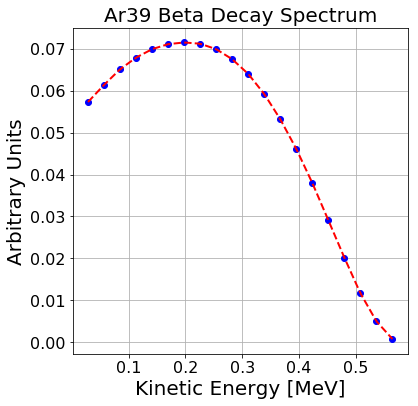

In [44]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

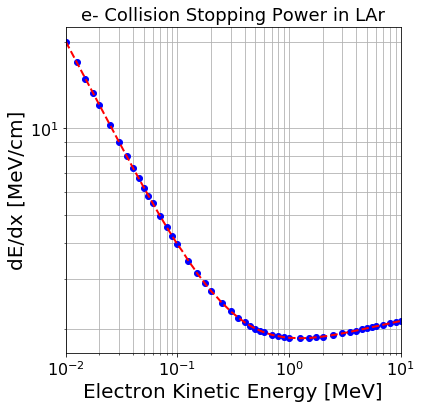

In [45]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

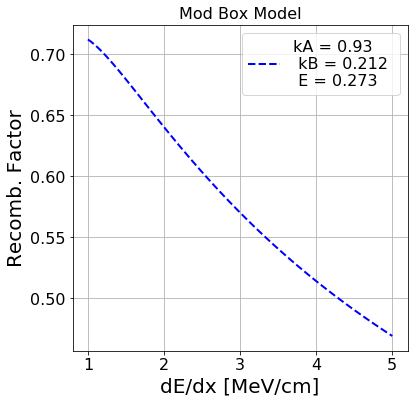

In [46]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

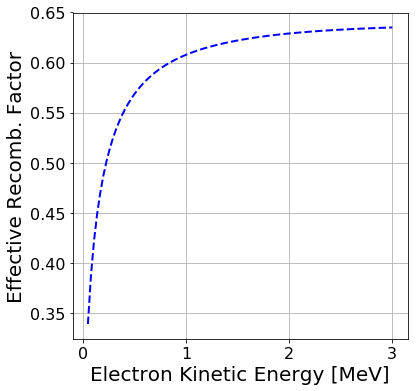

In [47]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



In [ ]:
fig = plt.figure(figsize=(20,10))
Evals = np.linspace(0.001,500,500)
# Evals = np.linspace(0.001,30,500)

Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
print fQ2E
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
# fig.savefig('Q2E.png', dpi=300)
# print (fQ2E(1425.54 * 238.4))
# print (fQ2E(521.225 * 238.4))
# print (fQ2E(2108.16 * 238.4))
# print (fQ2E(2026.97 * 238.4))
# print (fQ2E(1280.97 * 238.4))
# print (fQ2E(321.1692 * 238.4))



In [ ]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [ ]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [ ]:
print Charge(0.2,0.273)


In [ ]:
def E_recoY_off(df,gain):
    YQ_off = df['sps_cluster_charge50']
    QrecoY_off = YQ_off * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off = fQ2E(QrecoY_off)
    return ErecoY_off

def E_recoY_overlay(df,gain):
    YQ_overlay = df['sps_cluster_charge50']
    QrecoY_overlay = YQ_overlay * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay = fQ2E(QrecoY_overlay)
    return ErecoY_overlay


def E_recoY_off_sps(df,gain):
    YQ_off_sps = df['sps_cluster_charge']
    QrecoY_off_sps = YQ_off_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_sps = fQ2E(QrecoY_off_sps)
    return ErecoY_off_sps

def E_recoY_on_sps(df,gain):
    YQ_on_sps = df['sps_cluster_charge']
    QrecoY_on_sps = YQ_on_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on_sps = fQ2E(QrecoY_on_sps)
    return ErecoY_on_sps

def E_recoY_overlay_sps(df,gain):
    YQ_overlay_sps = df['sps_cluster_charge']
    QrecoY_overlay_sps = YQ_overlay_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_overlay_sps = fQ2E(QrecoY_overlay_sps)
    return ErecoY_overlay_sps


def E_recoY_on(df,gain):
    YQ_on  = df['sps_cluster_charge50']
    QrecoY_on = YQ_on * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_on = fQ2E(QrecoY_on)
    return ErecoY_on


In [ ]:
df_sps_charge_50_off=df_Event_beam_off.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_off['energy']=E_recoY_off(df_sps_charge_50_off,238.4)

df_sps_charge_50_overlay=df_Event_overlay.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_overlay['energy']=E_recoY_overlay(df_sps_charge_50_overlay,238.4)

df_sps_charge_50_on=df_Event_beam_on.query('sps_cluster_charge50 * 238.4 < 7140000. and sps_cluster_charge50 > 0.')
df_sps_charge_50_on['energy']=E_recoY_on(df_sps_charge_50_on,238.4)


In [ ]:
BINS = np.linspace(0,200,25)

fig = plt.figure(figsize=(12,7))

plt.hist(df_sps_charge_50_on['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM')

plt.hist(df_sps_charge_50_off['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM')

plt.hist(df_sps_charge_50_overlay['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY')

plt.legend(loc=1)

plt.grid()
plt.title("Energy per Spacepoint")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of entries')


plt.show()
# fig.savefig('Energy_run1_sps', dpi=400)
print(df_sps_charge_50_on['energy'].min())
print(df_sps_charge_50_off['energy'].min())
print(df_sps_charge_50_overlay['energy'].min())

In [ ]:
BINS = np.linspace(0,200,25)

fig = plt.figure(figsize=(12,7))
plt.hist(df_sps_charge_50_on['energy'].values,bins=BINS,histtype='step',lw=2,label='ON-BEAM',density=True)
plt.hist(df_sps_charge_50_off['energy'].values,bins=BINS,histtype='step',lw=2,label='OFF-BEAM',density=True)
plt.hist(df_sps_charge_50_overlay['energy'].values,bins=BINS,histtype='step',lw=2,label='OVERLAY',density=True)

plt.legend(loc=1)

plt.grid()
plt.title("Energy within 50 cm of the neutrino")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')


plt.show()
# fig.savefig('Energy_run1_area_normalized', dpi=400)

In [ ]:
noverlay_Event = len(df_sps_charge_50_overlay['energy'])
weightsoverlay_Event = np.ones(noverlay_Event) * overlay_scaling # factor needed to scale overlay to on-beam


nOFF_Event = len(df_sps_charge_50_off['energy'])
weightsOFF_Event = np.ones(nOFF_Event) * off_scaling # factor needed to scale off-beam to on-beam


WEIGHTS_Event = [weightsOFF_Event,weightsoverlay_Event]

In [ ]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,200,20)
xstacked = [df_sps_charge_50_off['energy'].values,df_sps_charge_50_overlay['energy'].values]
LABELS = ['Off Beam','Overlay']
plt.hist(xstacked,bins=BINS,histtype='stepfilled',label=LABELS,stacked=True,alpha=0.5,weights=WEIGHTS_Event)

vals,bine = np.histogram(df_sps_charge_50_on['energy'].values,bins=BINS)
binc = 0.5*(bine[1:]+bine[:-1])
vals = vals.astype(float)
# plt.yscale('log')
errs = np.sqrt(vals)
plt.errorbar(binc,vals,yerr=errs,fmt='o',color='k',markersize=5,label='ON Beam')
plt.title("50 cm radius around Vertex")
plt.xlabel('SpacePoint Energy (MeV)')
plt.ylabel('Number of entries')
plt.legend(loc=1)
plt.grid()

plt.show()
plt.draw()
fig.savefig('Energy_real_excess', dpi=400)